<a href="https://colab.research.google.com/github/firaolkiya/solar-challenge-week1/blob/eda-togo/notebooks/togo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing dependencies

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

view top 10 data

In [157]:
ds =pd.read_csv("/content/togo-dapaong_qc.csv")
ds.head(10)

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
5  2021-10-25 00:06 -1.2  0.0  0.0   0.0   0.0  24.9  93.9  1.2     1.4   
6  2021-10-25 00:07 -1.1  0.0  0.0   0.0   0.0  24.9  93.8  1.2     1.4   
7  2021-10-25 00:08 -1.1  0.0  0.0   0.0   0.0  24.9  93.7  1.1     1.4   
8  2021-10-25 00:09 -1.1  0.0  0.0   0.0   0.0  24.9  93.6  1.0     1.4   
9  2021-10-25 00:10 -1.1  0.0  0.0   0.0   0.0  24.9  93.4  0.9     1.4   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   
5      0.3  226.2      4.8  977         0            0.0   24.8   24.5   
6      0.3  226.4      0.9  977         0            0.0   24.8   24.5   
7      0.3  224.5      2.8  977         0            0.0   24.8   24.5   
8      0.3  225.6      4.1  977         0            0.0   24.8   24.5   
9      0.4  231.5      0.9  977         0            0.0   24.8   24.5   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN

check dimension of dataset

In [124]:
ds.shape

(525600, 19)

Summary Statistics & Missing-Value Report

In [158]:
print("Summary Statistics:")
ds.describe()


Summary Statistics:


GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.200000      26.500000       1.400000   
50%         4.300000      27.200000      59.300000       2.200000   
75%       411.000000      31.100000      80.800000       3.200000   
max      1367.000000      41.400000      99.800000      16.100000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        3.229490       0.557740     161.741845      10.559568   
std         1.882565       0.268923      91.877217       5.915490   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.900000       0.400000      74.800000       6.900000   
50%         2.900000       0.500000     199.100000      10.800000   
75%         4.400000       0.700000     233.500000      14.100000   
max        23.100000       4.700000     360.000000      86.900000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      975.915242       0.000535       0.001382      32.444403   
std         2.153977       0.023116       0.026350      10.998334   
min       968.000000       0.000000       0.000000      13.100000   
25%       975.000000       0.000000       0.000000      23.900000   
50%       976.000000       0.000000       0.000000      28.400000   
75%       977.000000       0.000000       0.000000      40.600000   
max       983.000000       1.000000       2.300000      70.400000   

               TModB  Comments  
count  525600.000000       0.0  
mean       33.543330       NaN  
std        12.769277       NaN  
min        13.100000       NaN  
25%        23.600000       NaN  
50%        28.400000       NaN  
75%        43.000000       NaN  
max        94.600000       NaN

In [171]:
# Calculate the mean of the 'DNI' column
mean_dni = ds['DNI'].mean()

# Filter out rows where 'DNI' is less than 25% of the mean
ds = ds[ds['DNI'] >= 0.25 * mean_dni]

# Display the shape of the filtered dataset to see how many rows were removed
print("\nShape after removing rows where DNI < 25% of mean:", ds.shape)

# Display the summary statistics of the filtered dataset
print("\nSummary Statistics after filtering:")
ds.describe()


Shape after removing rows where DNI < 25% of mean: (179643, 18)

Summary Statistics after filtering:


GHI            DNI            DHI           ModA  \
count  179643.000000  179643.000000  179643.000000  179643.000000   
mean      600.867143     439.956965     266.346171     587.799335   
std       273.723986     239.977208     135.644368     277.711742   
min        11.500000      37.900000      10.700000      11.000000   
25%       383.850000     230.700000     160.700000     363.700000   
50%       638.200000     447.800000     245.900000     621.300000   
75%       831.000000     639.500000     355.900000     828.700000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  179643.000000  179643.000000  179643.000000  179643.000000   
mean      569.785098      31.274776      42.421104       3.097052   
std       269.865284       4.436727      25.425377       1.430461   
min        10.900000      15.300000       3.300000       0.000000   
25%       351.300000      28.400000      16.500000       2.100000   
50%       602.800000      31.600000      43.100000       3.100000   
75%       801.000000      34.500000      64.700000       4.000000   
max      1367.000000      41.400000      99.200000      14.300000   

              WSgust        WSstdev             WD        WDstdev  \
count  179643.000000  179643.000000  179643.000000  179643.000000   
mean        4.214069       0.682368     164.655673      13.991623   
std         1.769739       0.254516      89.118852       5.610879   
min         0.000000       0.000000       0.000000       0.000000   
25%         3.000000       0.500000      80.000000      10.700000   
50%         4.100000       0.600000     187.900000      13.500000   
75%         5.400000       0.800000     238.850000      16.700000   
max        17.600000       3.200000     360.000000      86.900000   

                  BP       Cleaning  Precipitation          TModA  \
count  179643.000000  179643.000000  179643.000000  179643.000000   
mean      975.899785       0.001381       0.000031      44.293144   
std         2.376249       0.037130       0.003311       8.955113   
min       968.000000       0.000000       0.000000      14.500000   
25%       974.000000       0.000000       0.000000      38.600000   
50%       976.000000       0.000000       0.000000      44.700000   
75%       978.000000       0.000000       0.000000      50.700000   
max       983.000000       1.000000       0.700000      70.400000   

               TModB  
count  179643.000000  
mean       47.487386  
std        10.310795  
min        14.700000  
25%        40.600000  
50%        47.700000  
75%        54.800000  
max        94.600000

In [172]:
print("\n\n describe each columns")
ds.describe(include='all')



 describe each columns


Timestamp            GHI            DNI            DHI  \
count             179643  179643.000000  179643.000000  179643.000000   
unique            179643            NaN            NaN            NaN   
top     2022-10-24 17:18            NaN            NaN            NaN   
freq                   1            NaN            NaN            NaN   
mean                 NaN     600.867143     439.956965     266.346171   
std                  NaN     273.723986     239.977208     135.644368   
min                  NaN      11.500000      37.900000      10.700000   
25%                  NaN     383.850000     230.700000     160.700000   
50%                  NaN     638.200000     447.800000     245.900000   
75%                  NaN     831.000000     639.500000     355.900000   
max                  NaN    1424.000000    1004.500000     805.700000   

                 ModA           ModB           Tamb             RH  \
count   179643.000000  179643.000000  179643.000000  179643.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean       587.799335     569.785098      31.274776      42.421104   
std        277.711742     269.865284       4.436727      25.425377   
min         11.000000      10.900000      15.300000       3.300000   
25%        363.700000     351.300000      28.400000      16.500000   
50%        621.300000     602.800000      31.600000      43.100000   
75%        828.700000     801.000000      34.500000      64.700000   
max       1380.000000    1367.000000      41.400000      99.200000   

                   WS         WSgust        WSstdev             WD  \
count   179643.000000  179643.000000  179643.000000  179643.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         3.097052       4.214069       0.682368     164.655673   
std          1.430461       1.769739       0.254516      89.118852   
min          0.000000       0.000000       0.000000       0.000000   
25%          2.100000       3.000000       0.500000      80.000000   
50%          3.100000       4.100000       0.600000     187.900000   
75%          4.000000       5.400000       0.800000     238.850000   
max         14.300000      17.600000       3.200000     360.000000   

              WDstdev             BP       Cleaning  Precipitation  \
count   179643.000000  179643.000000  179643.000000  179643.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        13.991623     975.899785       0.001381       0.000031   
std          5.610879       2.376249       0.037130       0.003311   
min          0.000000     968.000000       0.000000       0.000000   
25%         10.700000     974.000000       0.000000       0.000000   
50%         13.500000     976.000000       0.000000       0.000000   
75%         16.700000     978.000000       0.000000       0.000000   
max         86.900000     983.000000       1.000000       0.700000   

                TModA          TModB  
count   179643.000000  179643.000000  
unique            NaN            NaN  
top               NaN            NaN  
freq              NaN            NaN  
mean        44.293144      47.487386  
std          8.955113      10.310795  
min         14.500000      14.700000  
25%         38.600000      40.600000  
50%         44.700000      47.700000  
75%         50.700000      54.800000  
max         70.400000      94.600000

In [160]:
print("\nMissing Value Report:")
missing_values = ds.isna().sum()
print(missing_values)

total_rows = ds.shape[0]
print("\nColumns with >5% nulls:")
for column, count in missing_values.items():
  if count / total_rows > 0.05:
    print(f"- {column}: {count} ({count / total_rows:.2%})")


Missing Value Report:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Columns with >5% nulls:
- Comments: 525600 (100.00%)


In [161]:
ds.dropna(inplace=True,axis=1)
ds.shape

(525600, 18)

check for an overview of dataset and missing values

In [133]:
def overview(ds):
  print("overview of dataset")
  print(ds.info())
  print("----------------------------------")
  print("total missing values in each column")
  print(ds.isna().sum())

print("data set before dropping columns")
overview(ds)


data set before dropping columns
overview of dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600

**Incorrect Entries (Negative Values)**

In [173]:
# Select numerical columns to check for negative values
numerical_cols = ds.select_dtypes(include=np.number).columns

# Check for negative values in numerical columns
for col in numerical_cols:
    negative_values = ds[ds[col] < 0]
    if not negative_values.empty:
        print(f"Negative values found in column '{col}':")
        print(negative_values)
        print("\n")


ds[numerical_cols] = ds[numerical_cols].mask(ds[numerical_cols] < 0, 0)


In [117]:
print("total missing values in each column")
ds.isna()


total missing values in each column


Timestamp    GHI    DNI    DHI   ModA   ModB   Tamb     RH     WS  \
0           False  False  False  False  False  False  False  False  False   
1           False  False  False  False  False  False  False  False  False   
2           False  False  False  False  False  False  False  False  False   
3           False  False  False  False  False  False  False  False  False   
4           False  False  False  False  False  False  False  False  False   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
525595      False  False  False  False  False  False  False  False  False   
525596      False  False  False  False  False  False  False  False  False   
525597      False  False  False  False  False  False  False  False  False   
525598      False  False  False  False  False  False  False  False  False   
525599      False  False  False  False  False  False  False  False  False   

        WSgust  WSstdev     WD  WDstdev     BP  Cleaning  Precipitation  \
0        False    False  False    False  False     False          False   
1        False    False  False    False  False     False          False   
2        False    False  False    False  False     False          False   
3        False    False  False    False  False     False          False   
4        False    False  False    False  False     False          False   
...        ...      ...    ...      ...    ...       ...            ...   
525595   False    False  False    False  False     False          False   
525596   False    False  False    False  False     False          False   
525597   False    False  False    False  False     False          False   
525598   False    False  False    False  False     False          False   
525599   False    False  False    False  False     False          False   

        TModA  TModB  
0       False  False  
1       False  False  
2       False  False  
3       False  False  
4       False  False  
...       ...    ...  
525595  False  False  
525596  False  False  
525597  False  False  
525598  False  False  
525599  False  False  

[525600 rows x 18 columns]

GET NUMERIC DATA

In [147]:
numeric_df = ds.select_dtypes(include=['number'])
numeric_df.head(10)

GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  WSstdev     WD  \
0  0.0  0.0  0.0   0.0   0.0  21.9  99.1  0.0     0.0      0.0    0.0   
1  0.0  0.0  0.0   0.0   0.0  21.9  99.2  0.0     0.0      0.0    0.0   
2  0.0  0.0  0.0   0.0   0.0  21.9  99.2  0.0     0.0      0.0    0.0   
3  0.0  0.0  0.0   0.0   0.0  21.9  99.3  0.0     0.0      0.0    0.0   
4  0.0  0.0  0.0   0.0   0.0  21.9  99.3  0.0     0.0      0.0    0.0   
5  0.0  0.0  0.0   0.0   0.0  21.9  99.3  0.0     0.0      0.0    0.0   
6  0.0  0.0  0.0   0.0   0.0  22.0  99.4  0.1     0.7      0.2  240.4   
7  0.0  0.0  0.0   0.0   0.0  22.0  99.5  0.2     0.7      0.4  233.5   
8  0.0  0.0  0.0   0.0   0.0  22.0  99.5  0.7     1.1      0.5  232.0   
9  0.0  0.0  0.0   0.0   0.0  21.9  99.2  0.6     1.1      0.5  232.5   

   WDstdev    BP  Cleaning  Precipitation  TModA  TModB  
0      0.0  1002         0            0.0   22.3   22.6  
1      0.0  1002         0            0.0   22.3   22.6  
2      0.0  1002         0            0.0   22.3   22.6  
3      0.0  1002         0            0.1   22.3   22.6  
4      0.0  1002         0            0.0   22.3   22.6  
5      0.0  1002         0            0.0   22.3   22.7  
6      0.0  1002         0            0.0   22.3   22.7  
7      1.6  1002         0            0.0   22.4   22.7  
8      0.3  1002         0            0.0   22.4   22.7  
9      0.3  1002         0            0.0   22.4   22.7

OUTLIER DETECTION

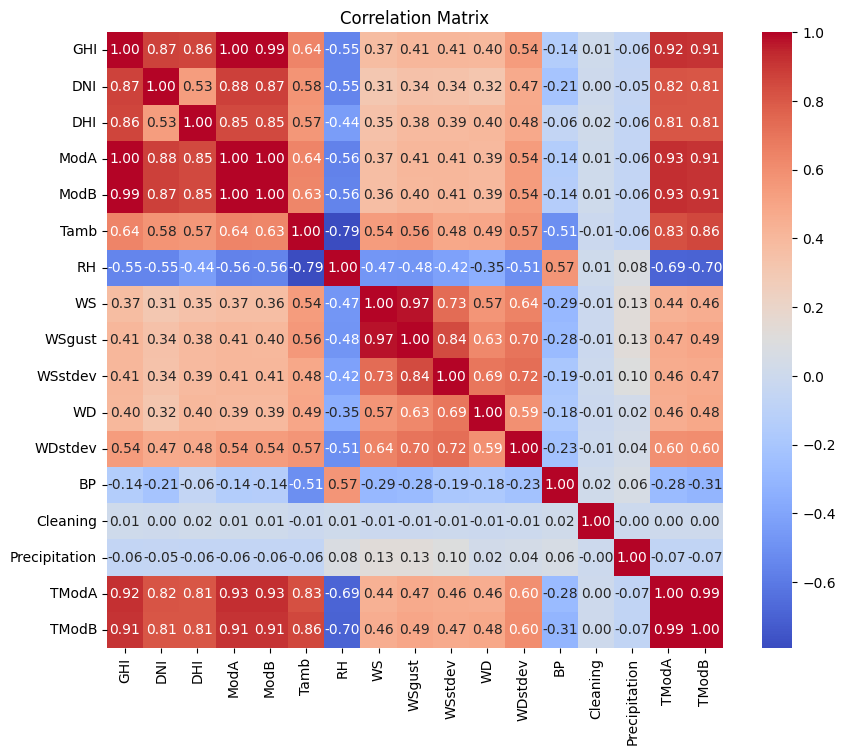

In [174]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

CALCULATE Z SCORE

In [149]:

# Function to detect outliers using Z-score
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[z_scores > threshold]
    return outliers

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Columns to check for missing values, outliers, and incorrect entries
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

print("\nChecking for missing values, outliers, and incorrect entries in specified columns:")

for col in columns_to_check:
    if col in ds.columns:
        print(f"\n--- Checking column: {col} ---")

        # Check for missing values
        missing_count = ds[col].isna().sum()
        print(f"Missing values: {missing_count}")

        if ds[col].dtype in ['int64', 'float64']:
            negative_count = (ds[col] < 0).sum()
            if negative_count > 0:
                print(f"Potential incorrect entries (negative values): {negative_count}")

            if ds[col].nunique() > 1: # Only perform outlier detection if there's more than one unique value
                outliers_iqr = detect_outliers_iqr(ds, col)
                print(f"Outliers detected using IQR: {len(outliers_iqr)}")
                if len(outliers_iqr) > 0:
                    print("Examples of detected outliers (IQR):")
                    print(outliers_iqr[col].head())

        else:
            print(f"Skipping outlier/incorrect entry check for {col} as it's not a numeric type.")
    else:
        print(f"\nColumn '{col}' not found in the dataset.")


Checking for missing values, outliers, and incorrect entries in specified columns:

--- Checking column: GHI ---
Missing values: 0
Outliers detected using IQR: 16684
Examples of detected outliers (IQR):
658     932.0
659     995.0
660     988.0
661     978.0
662    1071.0
Name: GHI, dtype: float64

--- Checking column: DNI ---
Missing values: 0
Outliers detected using IQR: 101770
Examples of detected outliers (IQR):
655    285.0
658    397.7
659    492.6
660    504.2
661    506.0
Name: DNI, dtype: float64

--- Checking column: DHI ---
Missing values: 0
Outliers detected using IQR: 4842
Examples of detected outliers (IQR):
651    569.6
652    584.1
653    594.3
654    599.6
655    605.9
Name: DHI, dtype: float64

--- Checking column: ModA ---
Missing values: 0
Outliers detected using IQR: 21017
Examples of detected outliers (IQR):
655     912.0
658    1002.0
659    1065.0
660    1050.0
661    1049.0
Name: ModA, dtype: float64

--- Checking column: ModB ---
Missing values: 0
Outliers de

Compute Z-scores for GHI, DNI, DHI, ModA, ModB, WS, WSgust; flag

In [166]:
# Drop rows with missing values in the specified columns
ds_cleaned = ds.dropna(subset=columns_to_check).copy()

print("\nDataset after dropping rows with missing values in key columns:")
overview(ds_cleaned)

# Compute Z-scores for the specified columns
zscore_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

for col in zscore_cols:
  if col in ds_cleaned.columns and ds_cleaned[col].nunique() > 1: # Ensure column exists and has variance
    # Handle potential division by zero if standard deviation is 0
    std_dev = ds_cleaned[col].std()
    if std_dev == 0:
        ds_cleaned[f'{col}_ZScore'] = 0 # Assign Z-score of 0 if no variance
    else:
        ds_cleaned[f'{col}_ZScore'] = stats.zscore(ds_cleaned[col])
  else:
    print(f"Skipping Z-score calculation for {col} as it's not in the dataset or has no variance.")


# Flag rows with |Z| > 3 in any of the computed Z-score columns
zscore_columns = [f'{col}_ZScore' for col in zscore_cols if f'{col}_ZScore' in ds_cleaned.columns]

if zscore_columns:
    ds_cleaned['Outlier_Flag'] = (ds_cleaned[zscore_columns].abs() > 3).any(axis=1)
else:
    ds_cleaned['Outlier_Flag'] = False # No Z-score columns to flag

print("\nDataset with Z-scores and Outlier Flag:")
print(ds_cleaned[['GHI', 'GHI_ZScore', 'DNI', 'DNI_ZScore', 'DHI', 'DHI_ZScore', 'ModA', 'ModA_ZScore', 'ModB', 'ModB_ZScore', 'WS', 'WS_ZScore', 'WSgust', 'WSgust_ZScore', 'Outlier_Flag']].head())

print("\nRows flagged as potential outliers (based on |Z| > 3):")
print(ds_cleaned[ds_cleaned['Outlier_Flag']].head())


Dataset after dropping rows with missing values in key columns:
overview of dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  fl

In [139]:
import os

# Create the directory if it doesn't exist
output_dir = 'data'
os.makedirs(output_dir, exist_ok=True)

# Define the output file path
output_file = os.path.join(output_dir, 'sierraleone.csv')

# Export the cleaned DataFrame to CSV
ds_cleaned.to_csv(output_file, index=False)

print(f"\nCleaned DataFrame exported to {output_file}")


Cleaned DataFrame exported to data/sierraleone.csv


Time Series Analysis

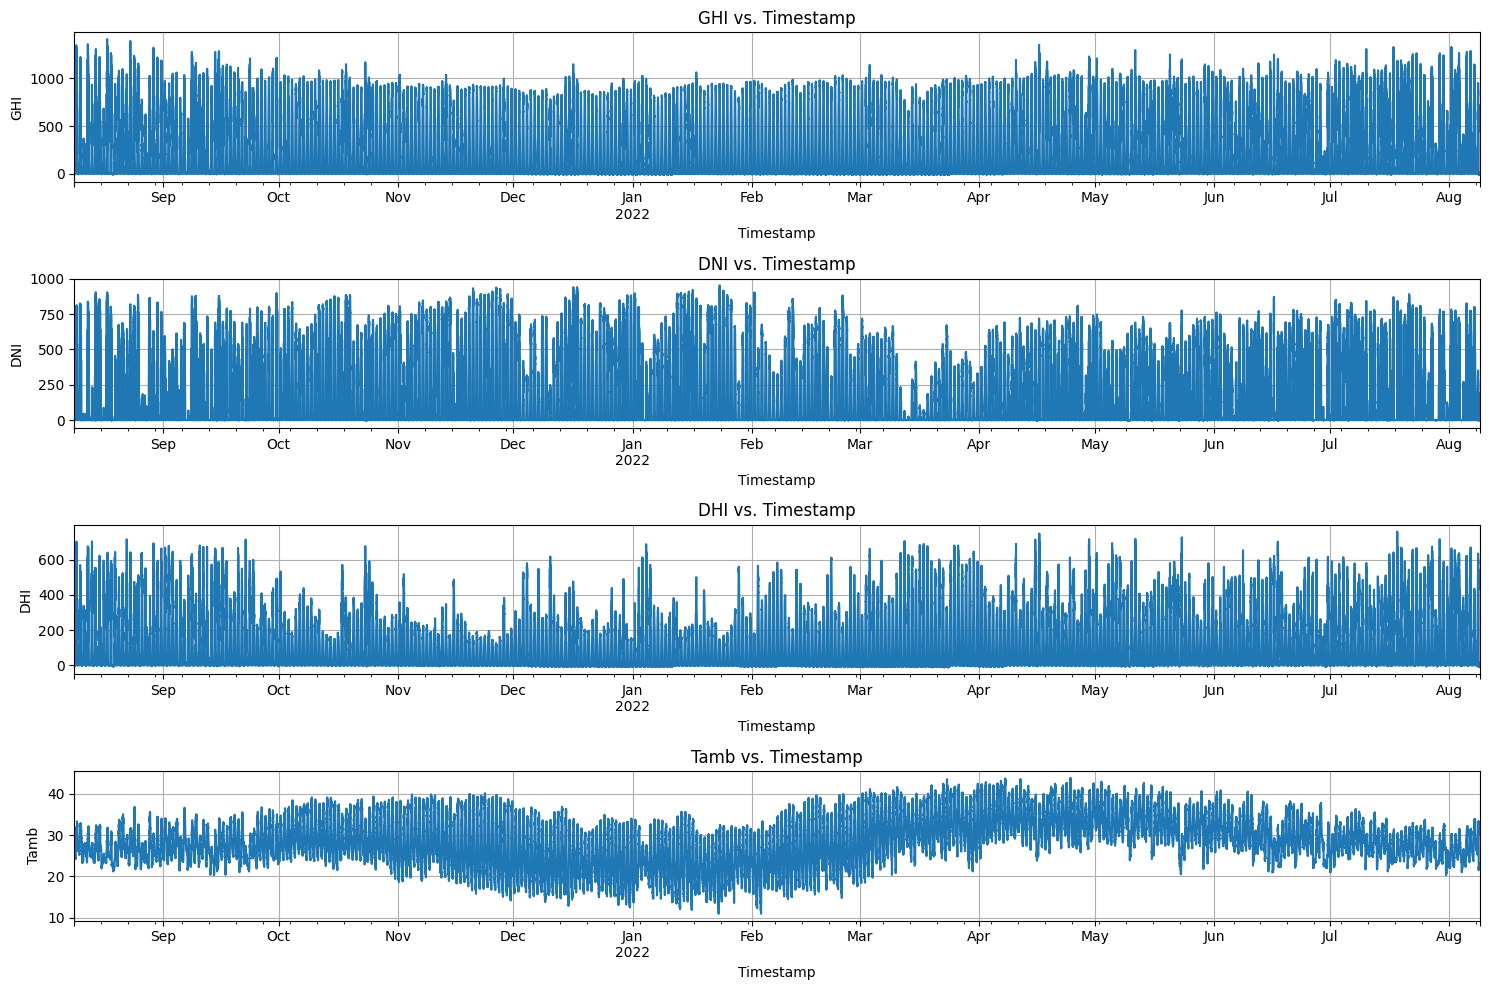

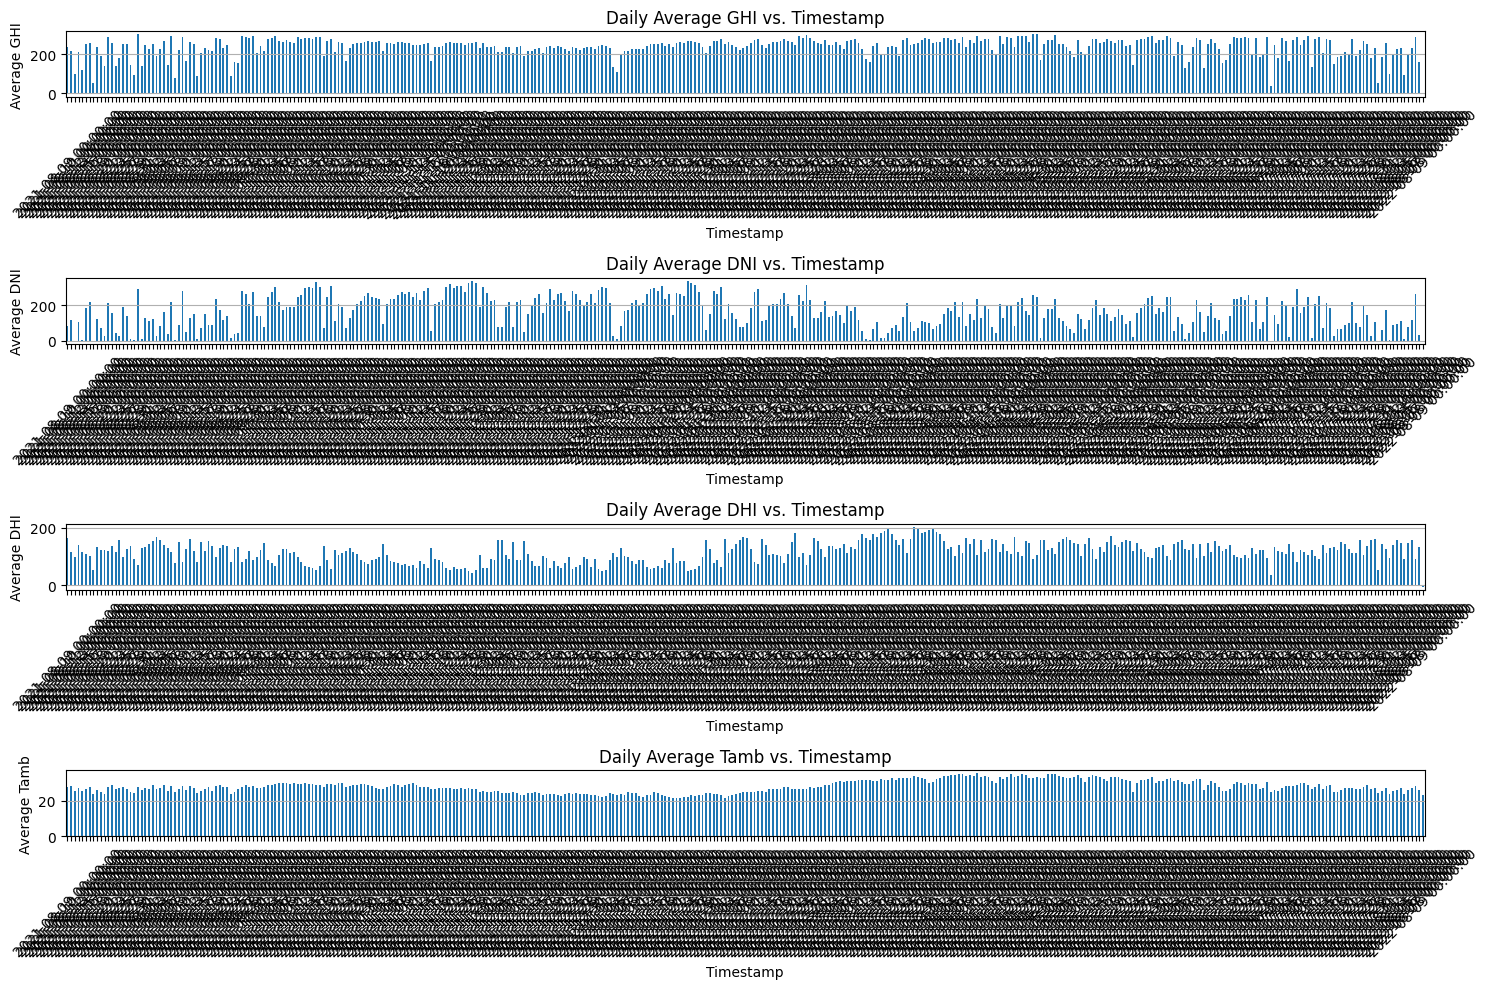

In [175]:


# Define the columns to plot
time_series_cols = ['GHI', 'DNI', 'DHI', 'Tamb']

# Create line plots
plt.figure(figsize=(15, 10))

for i, col in enumerate(time_series_cols):
    plt.subplot(len(time_series_cols), 1, i + 1)
    ds_time_indexed[col].plot(kind='line')
    plt.title(f'{col} vs. Timestamp')
    plt.ylabel(col)
    plt.xlabel('Timestamp')
    plt.grid(True)

plt.tight_layout()
plt.show()

# For demonstration, let's resample to daily averages for a clearer bar chart view
ds_daily = ds_time_indexed[time_series_cols].resample('D').mean()

plt.figure(figsize=(15, 10))

for i, col in enumerate(time_series_cols):
    plt.subplot(len(time_series_cols), 1, i + 1)
    ds_daily[col].plot(kind='bar')
    plt.title(f'Daily Average {col} vs. Timestamp')
    plt.ylabel(f'Average {col}')
    plt.xlabel('Timestamp')
    plt.xticks(rotation=45)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [100]:
ds.shape

(525600, 19)

**Cleaning Impact**


Average ModA and ModB pre/post cleaning:
  Cleaning_Flag        ModA        ModB
0    Post-Clean  603.990569  584.962245
1     Pre-Clean  219.370346  213.017809


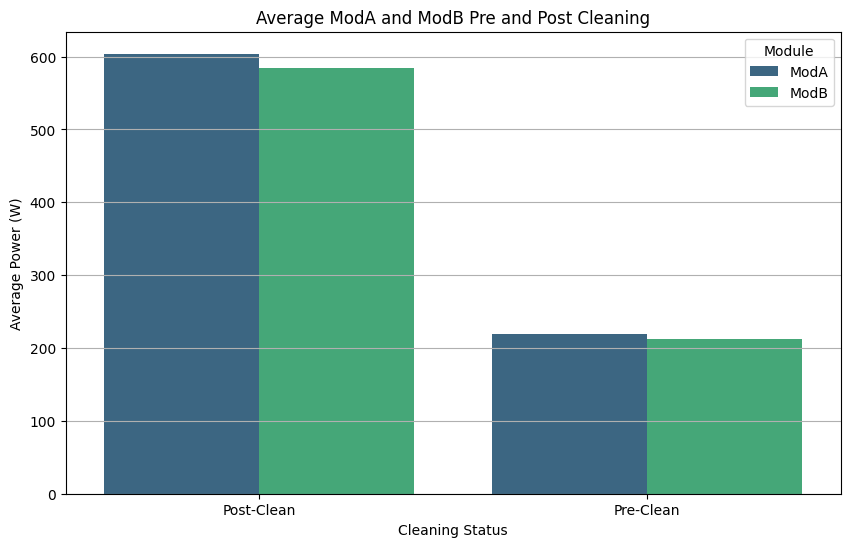

In [176]:

ds_cleaned['Cleaning_Flag'] = ds_cleaned['Outlier_Flag'].apply(lambda x: 'Post-Clean' if x else 'Pre-Clean')

# Group by Cleaning_Flag and calculate the mean of ModA and ModB
mod_comparison = ds_cleaned.groupby('Cleaning_Flag')[['ModA', 'ModB']].mean().reset_index()

print("\nAverage ModA and ModB pre/post cleaning:")
print(mod_comparison)

# Melt the DataFrame for plotting
mod_comparison_melted = mod_comparison.melt(id_vars='Cleaning_Flag', var_name='Module', value_name='Average Power')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=mod_comparison_melted, x='Cleaning_Flag', y='Average Power', hue='Module', palette='viridis')
plt.title('Average ModA and ModB Pre and Post Cleaning')
plt.ylabel('Average Power (W)')
plt.xlabel('Cleaning Status')
plt.grid(axis='y')
plt.show()

**Correlation & Relationship Analysis**

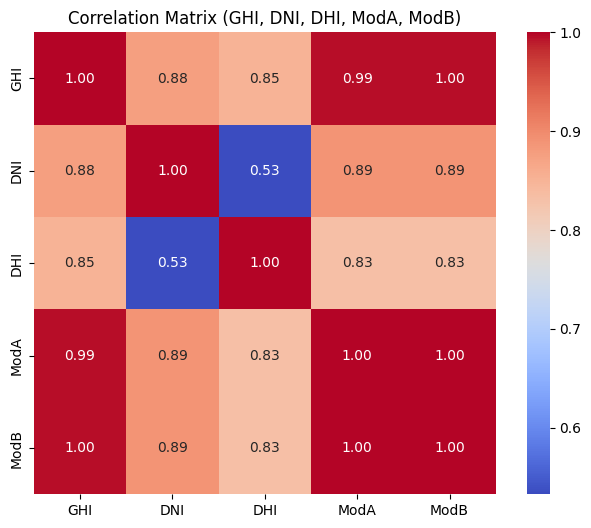

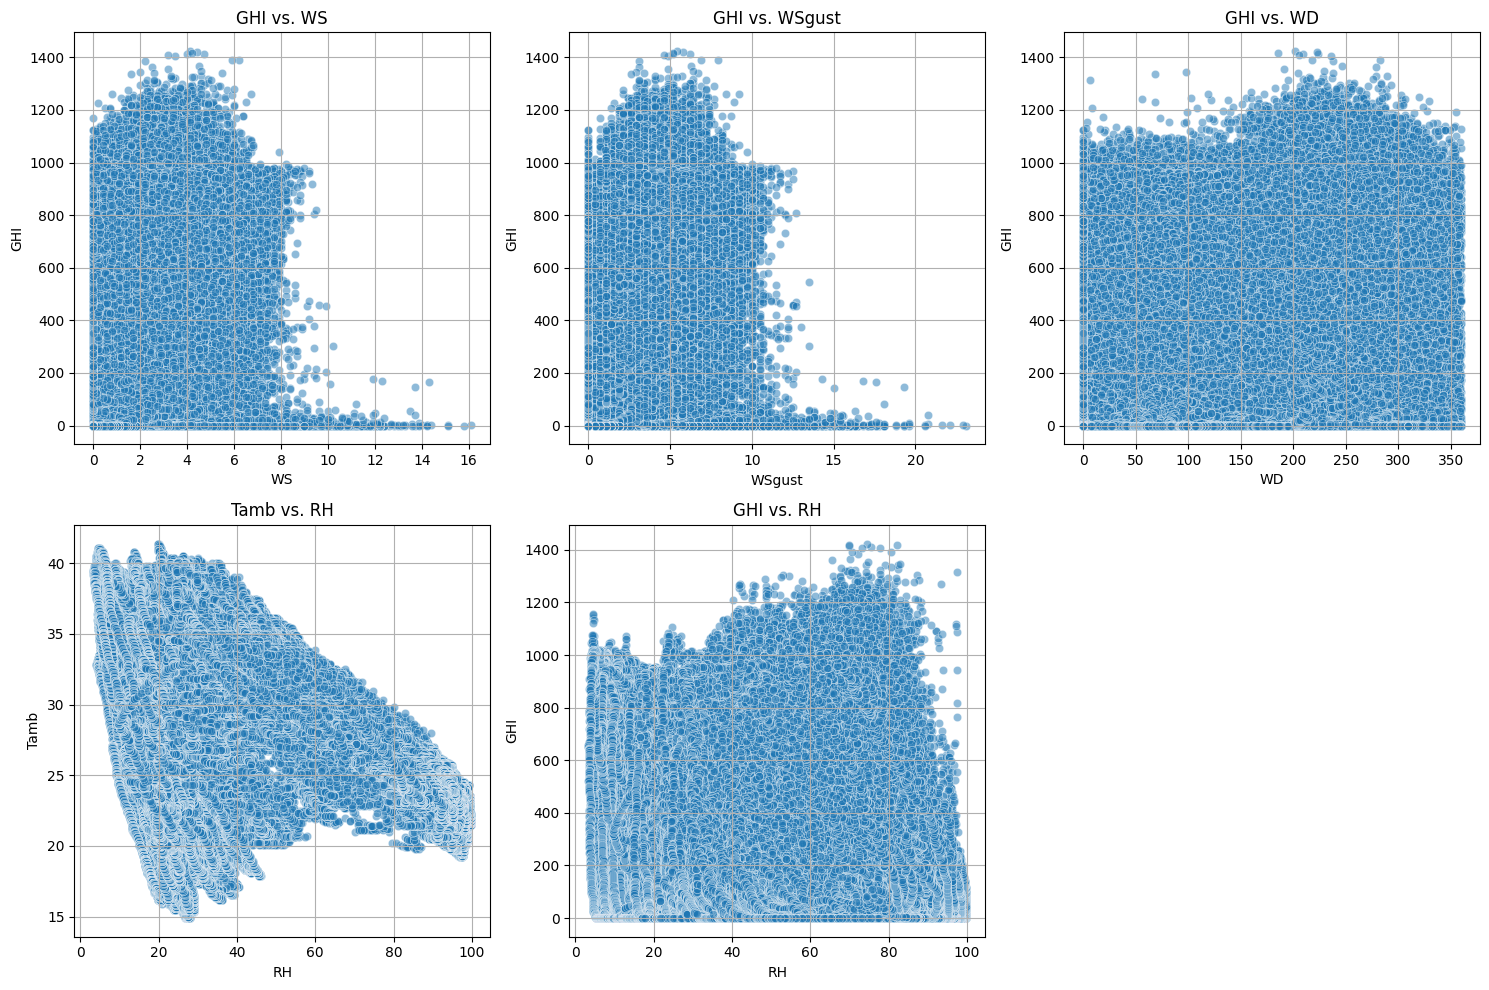

In [177]:

# Heatmap of correlations
correlation_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
plt.figure(figsize=(8, 6))
sns.heatmap(ds_cleaned[correlation_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix (GHI, DNI, DHI, ModA, ModB)")
plt.show()

# Scatter plots
scatter_pairs = [
    ('WS', 'GHI'),
    ('WSgust', 'GHI'),
    ('WD', 'GHI'),
    ('RH', 'Tamb'),
    ('RH', 'GHI')
]

plt.figure(figsize=(15, 10))

for i, (x_col, y_col) in enumerate(scatter_pairs):
    if x_col in ds_cleaned.columns and y_col in ds_cleaned.columns:
        plt.subplot(2, 3, i + 1) # Arrange in 2 rows, 3 columns
        sns.scatterplot(data=ds_cleaned, x=x_col, y=y_col, alpha=0.5)
        plt.title(f'{y_col} vs. {x_col}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.grid(True)
    else:
        print(f"Skipping scatter plot for {x_col} vs. {y_col} as one or both columns are not in the dataset.")

plt.tight_layout()
plt.show()

**Wind & Distribution Analysis**

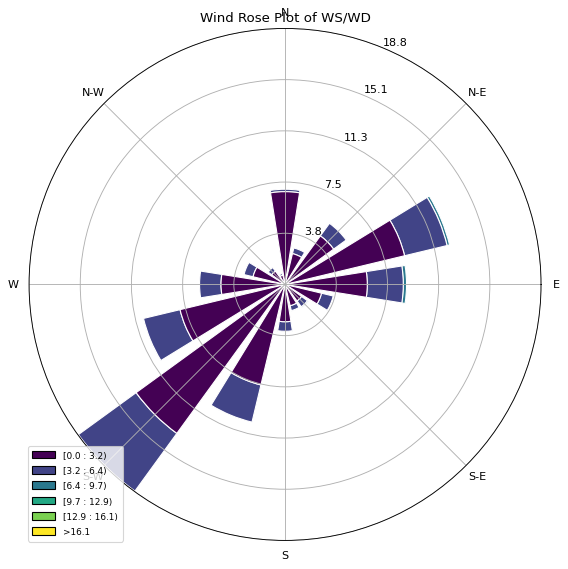

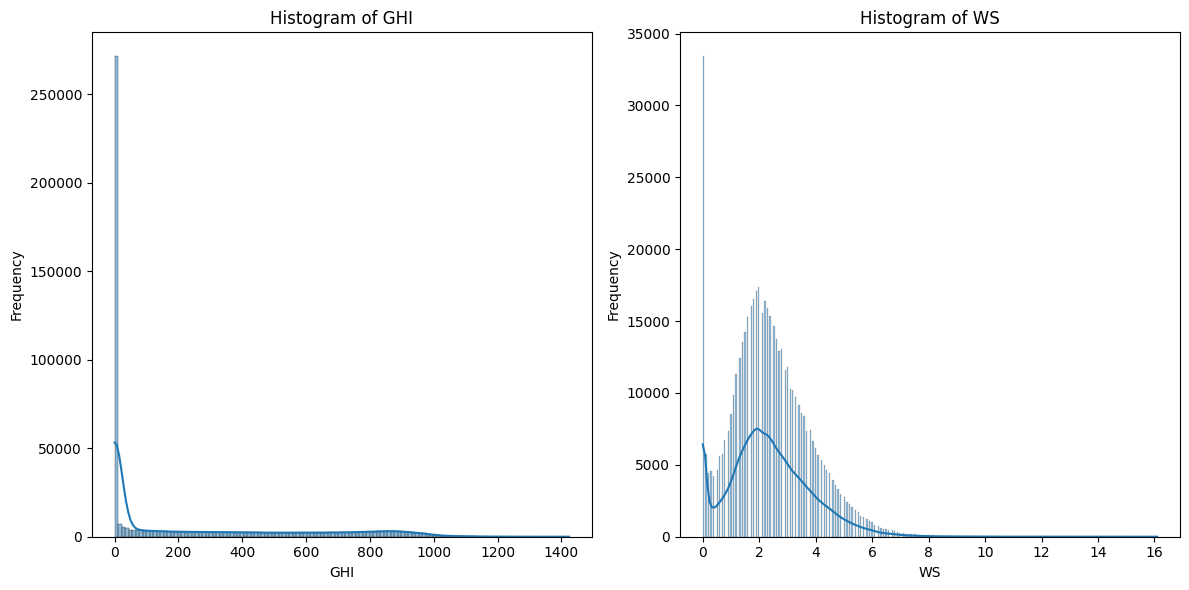

In [178]:

# Check if 'WD' and 'WS' columns exist
if 'WD' in ds_cleaned.columns and 'WS' in ds_cleaned.columns:
  # Requires windrose library: !pip install windrose
  !pip install windrose
  from windrose import WindroseAxes

  # Create a WindroseAxes instance
  ax = WindroseAxes.from_ax()
  # Plot the wind rose
  ax.bar(ds_cleaned['WD'], ds_cleaned['WS'], normed=True, opening=0.8, edgecolor='white')
  # Set the title
  ax.set_title('Wind Rose Plot of WS/WD')
  # Add legend
  ax.set_legend()
  plt.show()
else:
  print("Skipping Wind Rose plot as 'WD' or 'WS' column is not in the dataset.")


# Histograms for GHI and WS
plt.figure(figsize=(12, 6))

# Histogram for GHI
if 'GHI' in ds_cleaned.columns:
  plt.subplot(1, 2, 1)
  sns.histplot(ds_cleaned['GHI'], kde=True)
  plt.title('Histogram of GHI')
  plt.xlabel('GHI')
  plt.ylabel('Frequency')
else:
  print("Skipping GHI histogram as 'GHI' column is not in the dataset.")

# Histogram for WS
if 'WS' in ds_cleaned.columns:
  plt.subplot(1, 2, 2)
  sns.histplot(ds_cleaned['WS'], kde=True)
  plt.title('Histogram of WS')
  plt.xlabel('WS')
  plt.ylabel('Frequency')
else:
  print("Skipping WS histogram as 'WS' column is not in the dataset.")

plt.tight_layout()
plt.show()


**Temperature Analysis**

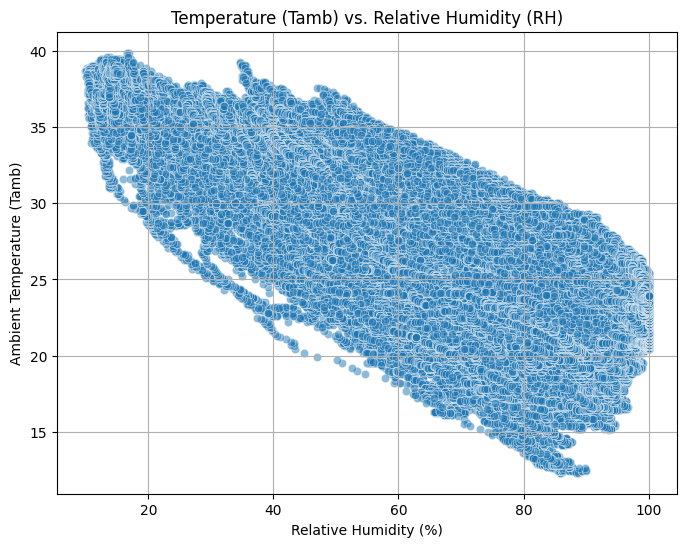

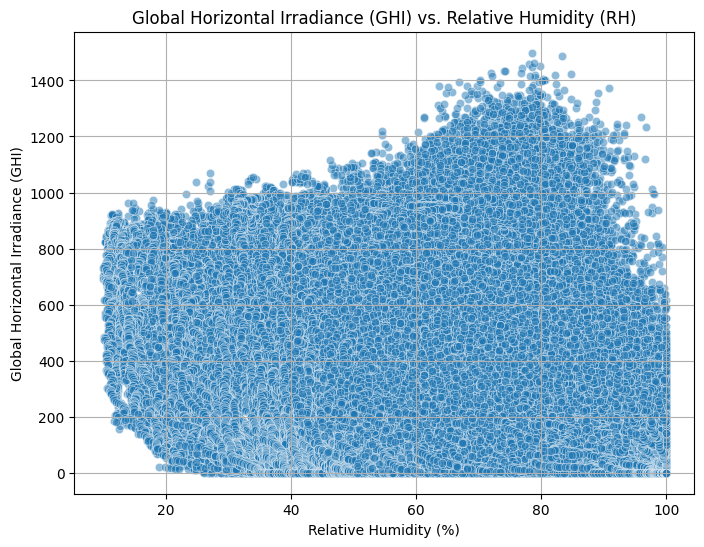

In [155]:
# Scatter plot for Tamb vs. RH
if 'Tamb' in ds_cleaned.columns and 'RH' in ds_cleaned.columns:
  plt.figure(figsize=(8, 6))
  sns.scatterplot(data=ds_cleaned, x='RH', y='Tamb', alpha=0.5)
  plt.title('Temperature (Tamb) vs. Relative Humidity (RH)')
  plt.xlabel('Relative Humidity (%)')
  plt.ylabel('Ambient Temperature (Tamb)')
  plt.grid(True)
  plt.show()
else:
  print("Skipping Temperature vs. RH scatter plot as 'Tamb' or 'RH' column is not in the dataset.")

# Scatter plot for GHI vs. RH
if 'GHI' in ds_cleaned.columns and 'RH' in ds_cleaned.columns:
  plt.figure(figsize=(8, 6))
  sns.scatterplot(data=ds_cleaned, x='RH', y='GHI', alpha=0.5)
  plt.title('Global Horizontal Irradiance (GHI) vs. Relative Humidity (RH)')
  plt.xlabel('Relative Humidity (%)')
  plt.ylabel('Global Horizontal Irradiance (GHI)')
  plt.grid(True)
  plt.show()
else:
  print("Skipping GHI vs. RH scatter plot as 'GHI' or 'RH' column is not in the dataset.")

***Bubble Chart***

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


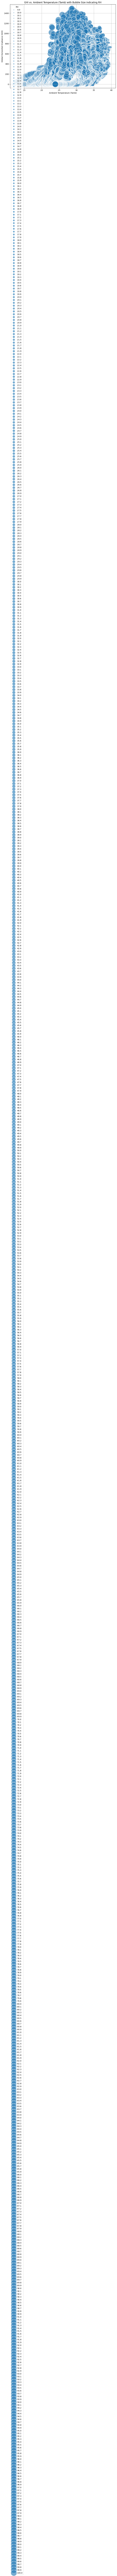

In [156]:
# prompt: GHI vs. Tamb with bubble size = RH or BP.

# Scatter plot with bubble size based on RH or BP
# Let's use RH as the size variable

# Check if required columns exist
if 'GHI' in ds_cleaned.columns and 'Tamb' in ds_cleaned.columns and ('RH' in ds_cleaned.columns or 'BP' in ds_cleaned.columns):

    size_col = 'RH' if 'RH' in ds_cleaned.columns else ('BP' if 'BP' in ds_cleaned.columns else None)

    if size_col:
        plt.figure(figsize=(10, 8))
        sns.scatterplot(data=ds_cleaned, x='Tamb', y='GHI', size=size_col, alpha=0.6, sizes=(20, 1000), legend='full')
        plt.title(f'GHI vs. Ambient Temperature (Tamb) with Bubble Size indicating {size_col}')
        plt.xlabel('Ambient Temperature (Tamb)')
        plt.ylabel('Global Horizontal Irradiance (GHI)')
        plt.grid(True)
        plt.show()
    else:
        print("Skipping bubble plot as neither 'RH' nor 'BP' column is available for bubble size.")

else:
    print("Skipping bubble plot as required columns ('GHI', 'Tamb', and either 'RH' or 'BP') are not in the dataset.")

Visualize columns

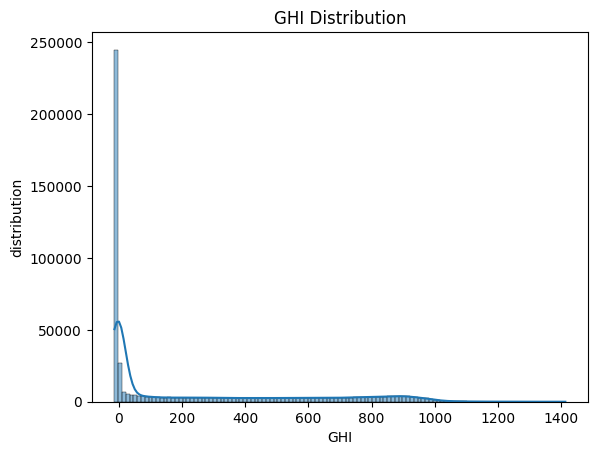

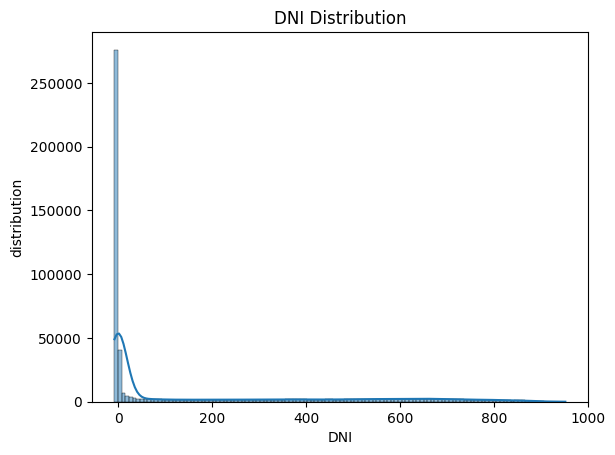

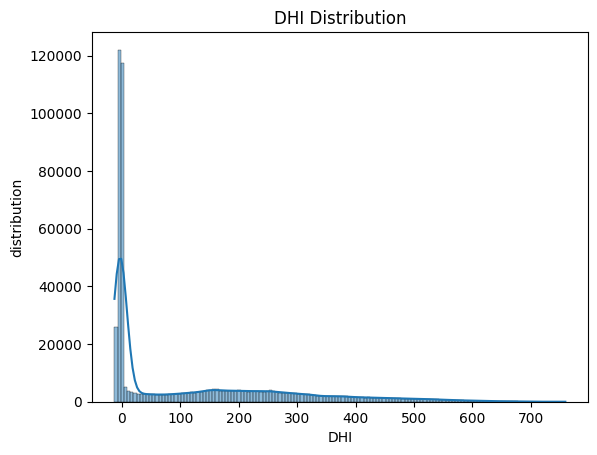

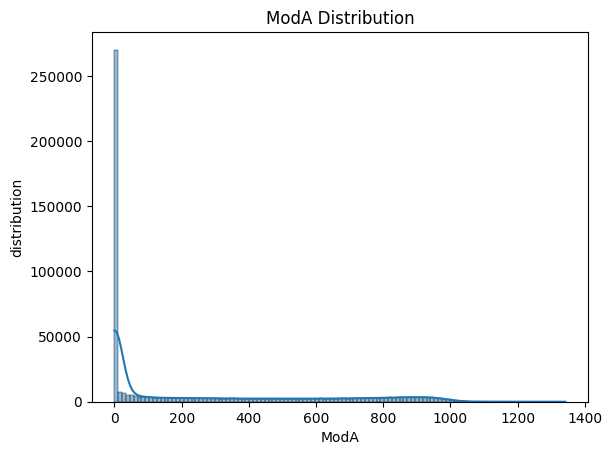

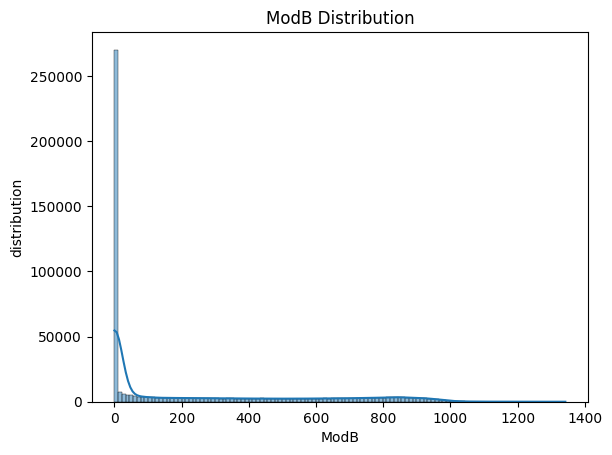

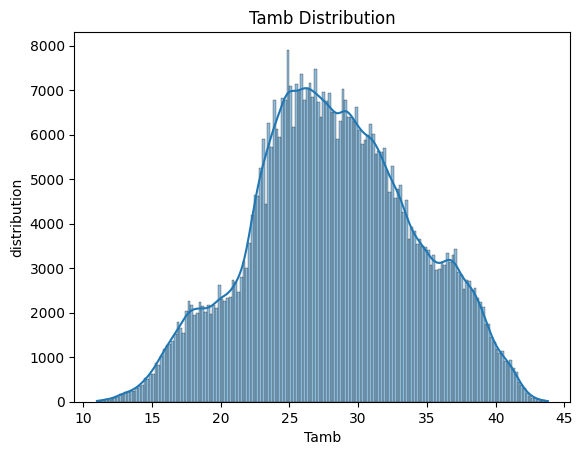

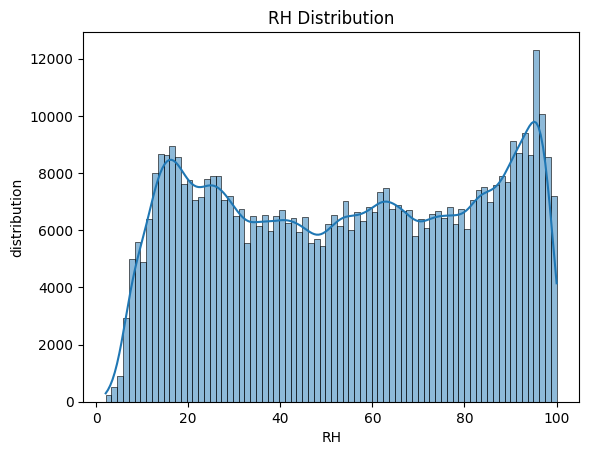

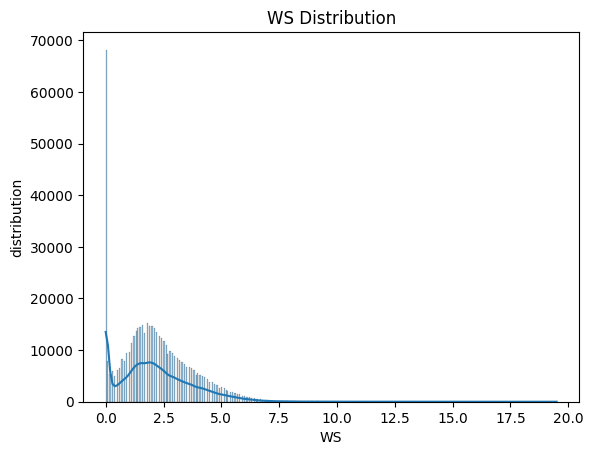

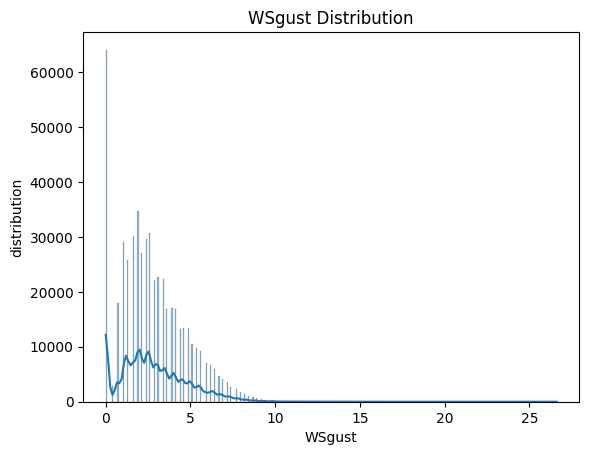

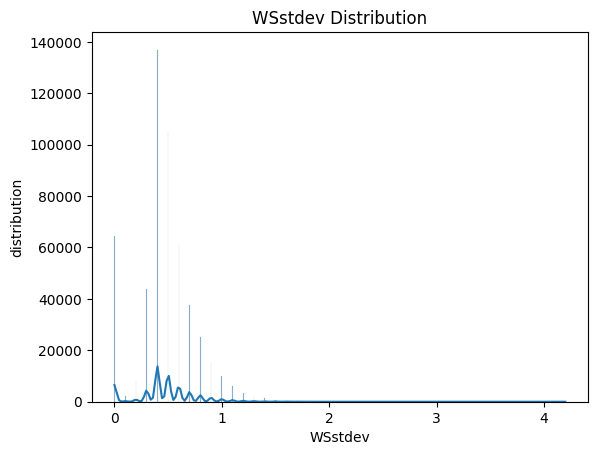

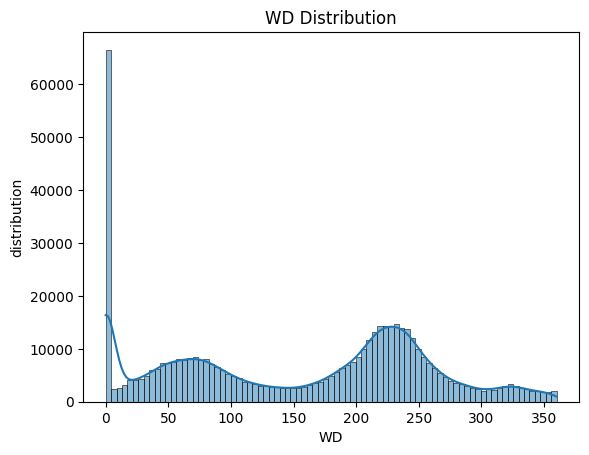

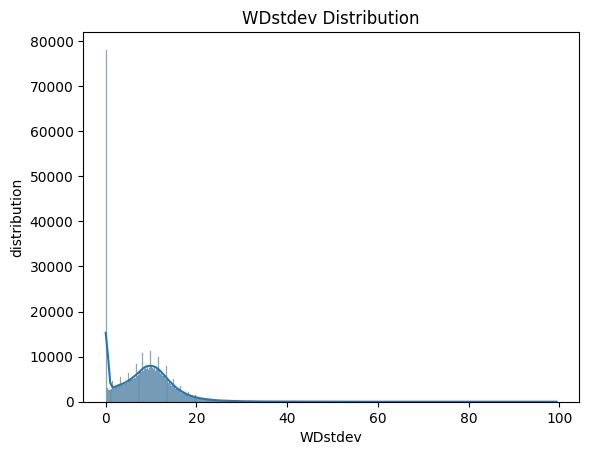

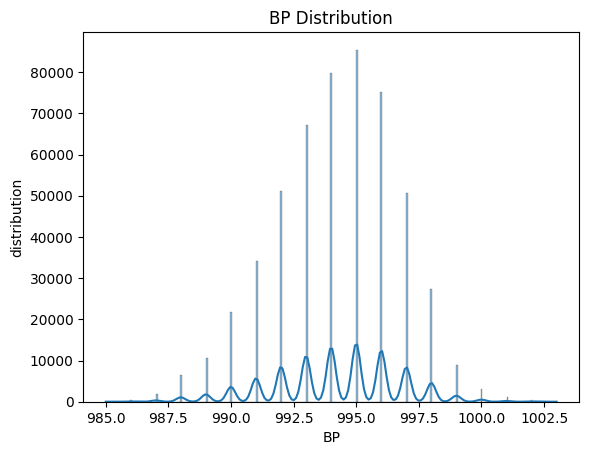

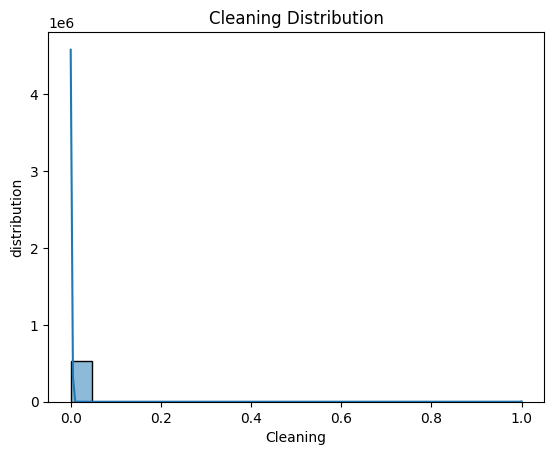

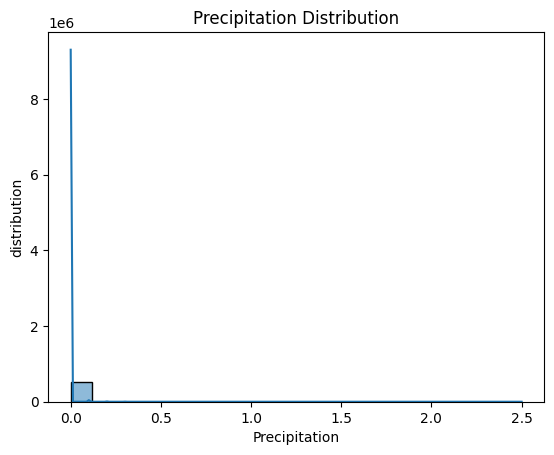

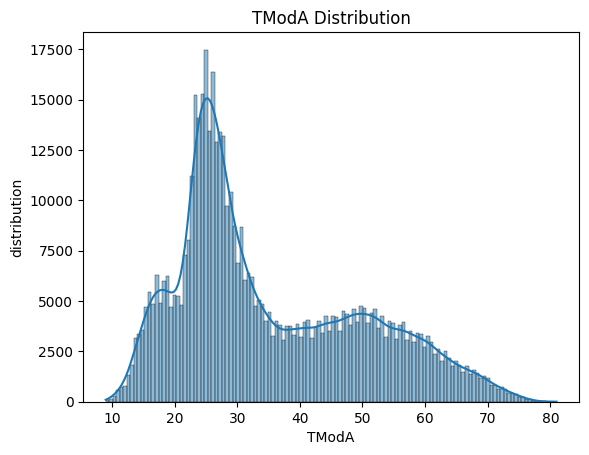

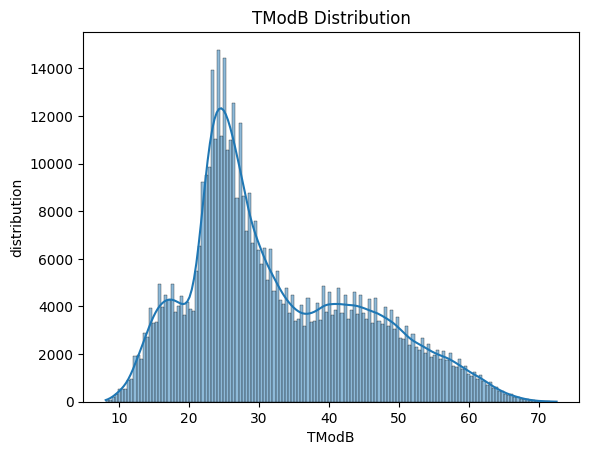

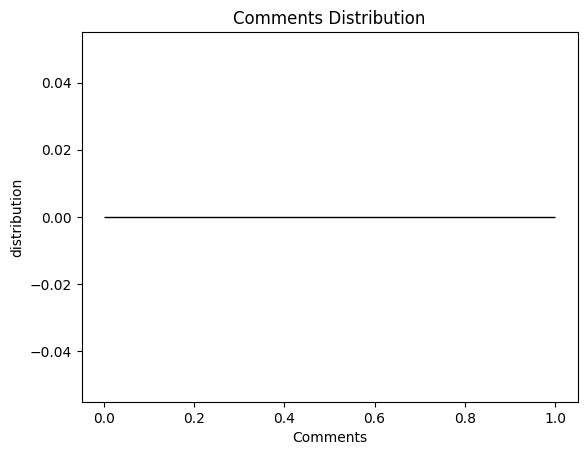

In [47]:
for col in numeric_df:
    sns.histplot(numeric_df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("distribution")
    plt.show()

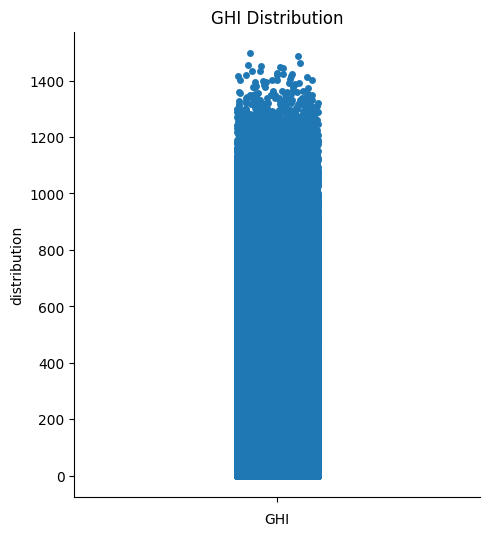

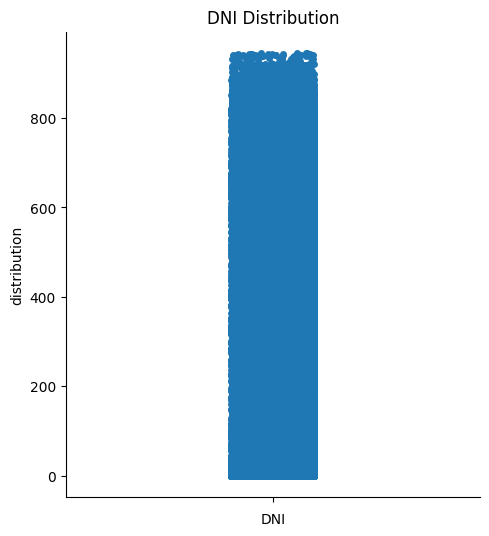

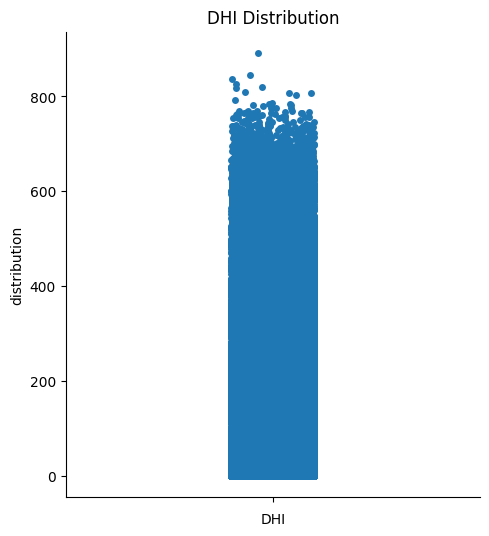

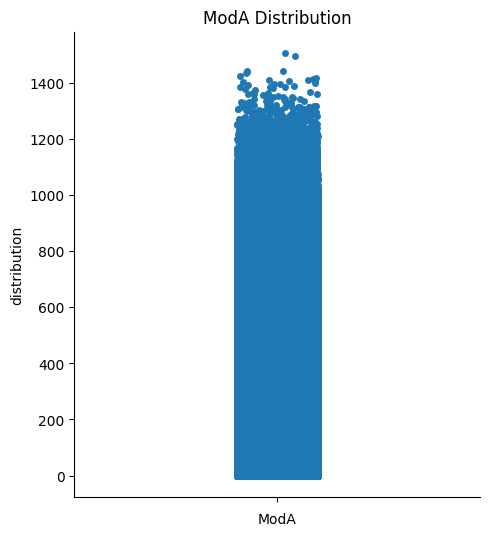

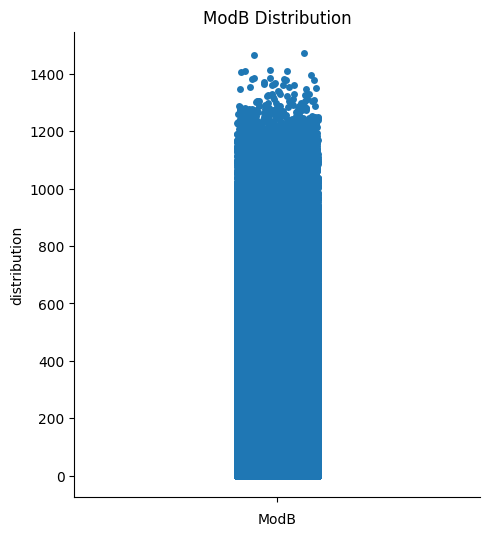

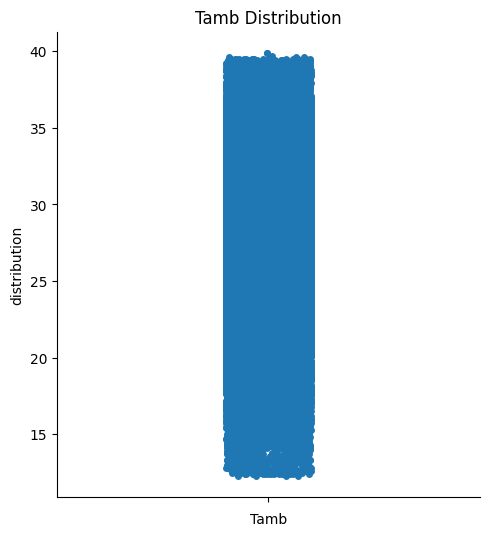

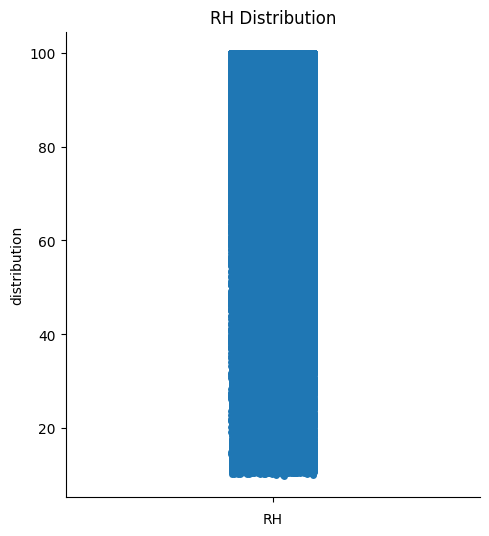

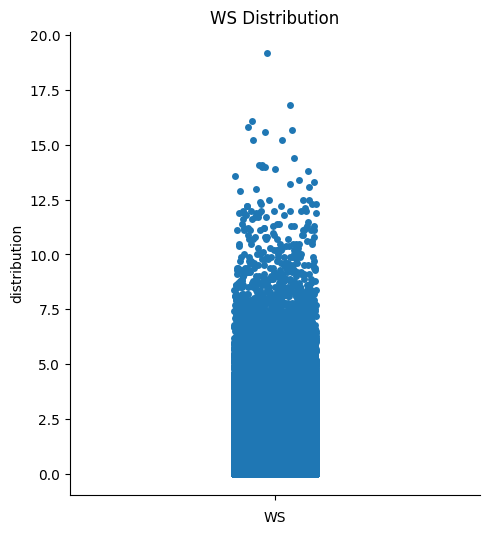

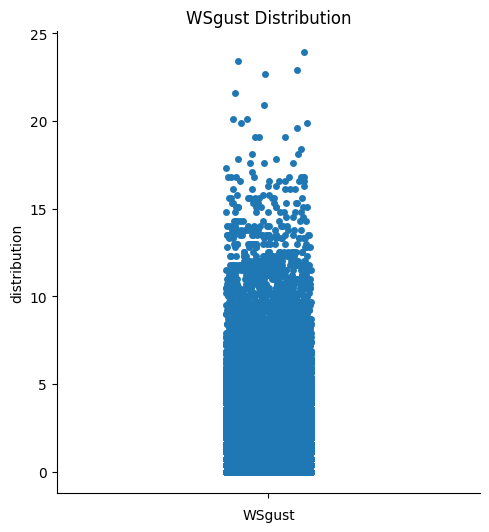

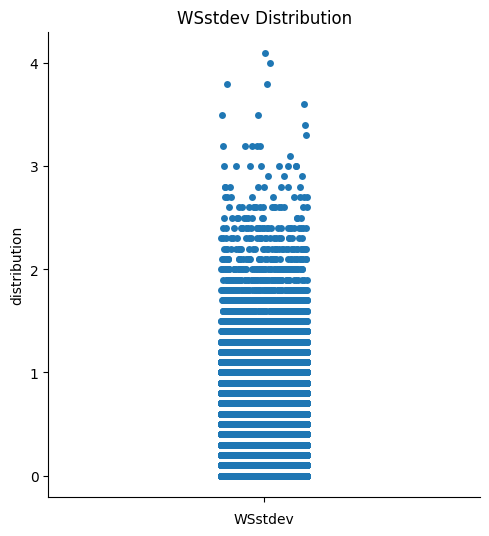

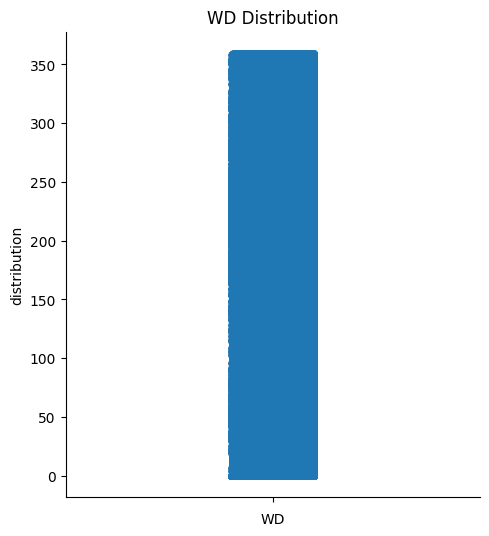

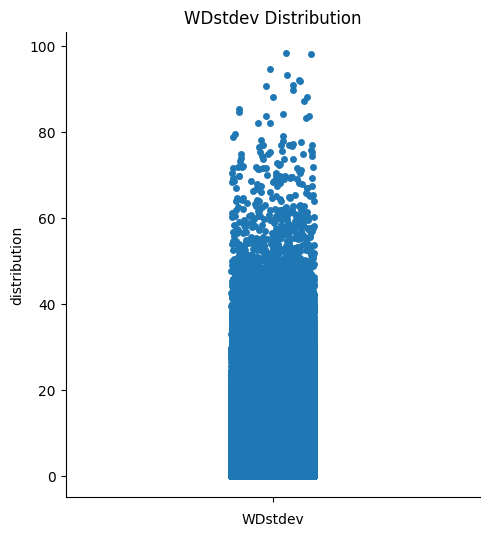

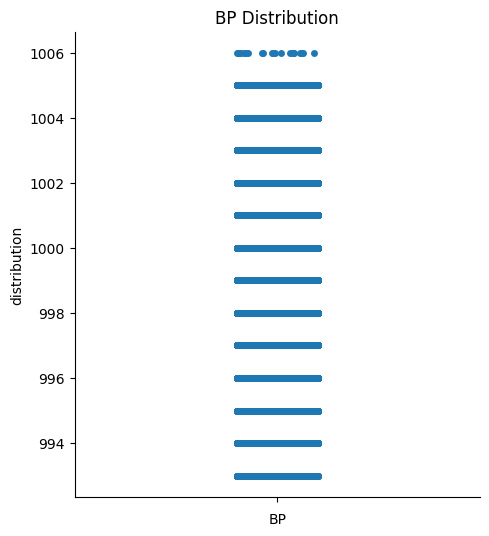

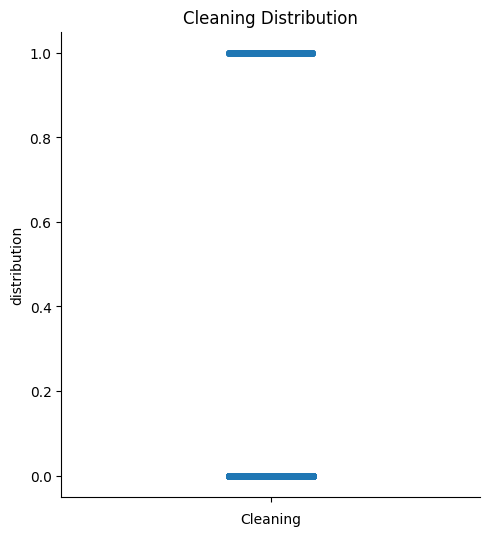

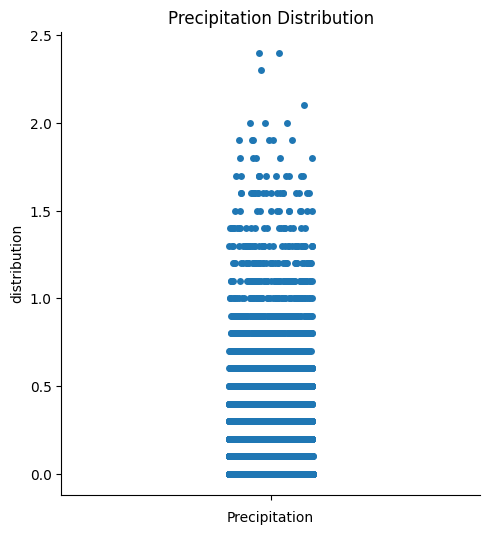

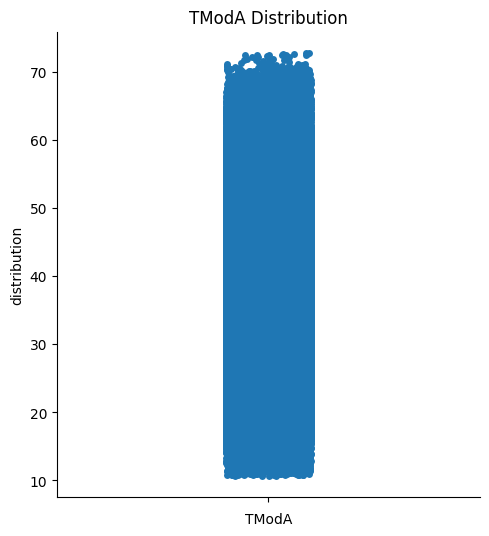

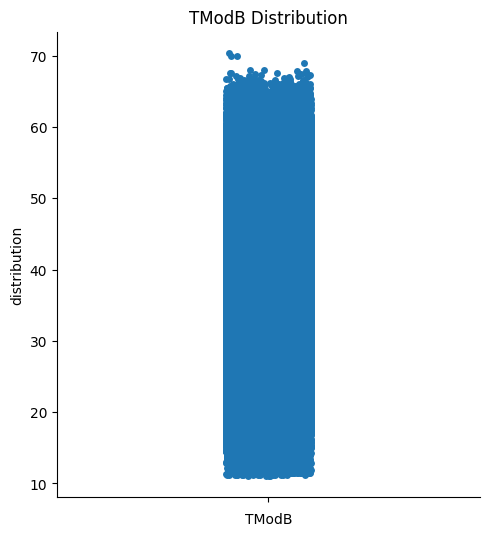

In [164]:
for col in numeric_df:
    sns.catplot(numeric_df[col])
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("distribution")
    plt.show()

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB'],
      dtype='object')


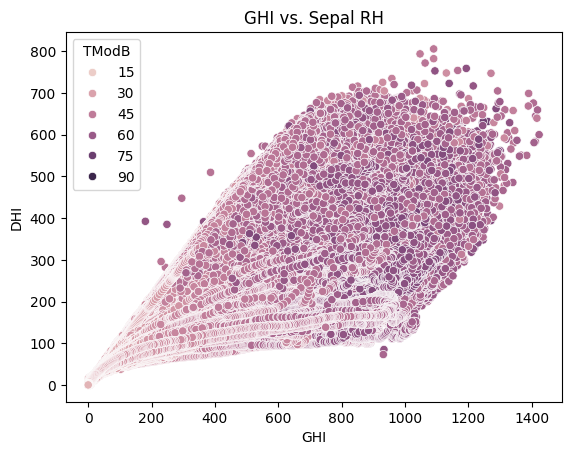

In [163]:
print(ds.columns)
sns.scatterplot(data=ds, x="GHI", y="DHI", hue="TModB")
plt.title("GHI vs. Sepal RH")
plt.show()
